In [ ]:
# We will be building a model for prediitng the yield of crop in different regions of India by considering different parameters
# such as  weather conditions,crop season, rain, temperature, pesticides information ,etc. The dataset for this projet
# has been taken from kaggle. 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Tushar Chandel/OneDrive/Desktop/thehindu.csv")

In [3]:
df.head()

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,20.48349,1.971802,1013.011877,64.876363,clay,598.552,0.000,0.000,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,20.48349,1.971802,1013.011877,64.876363,sandy,7.182,18.354,0.000,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,20.48349,1.971802,1013.011877,64.876363,clay,35.742,0.000,0.000,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,20.48349,1.971802,1013.011877,64.876363,peaty,8.740,8.740,0.000,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,20.48349,1.971802,1013.011877,64.876363,clay,0.615,0.615,0.615,165.0


In [6]:
df.shape

(20000, 15)

In [5]:
#Reducing the size of our dataframe
num_rows_to_keep = 20000
df = df.sample(n=num_rows_to_keep, random_state=42)

# Data Exploration & Preprocessing

In [7]:
df['state_names'].value_counts()

Uttar Pradesh                  2731
Madhya Pradesh                 1865
Karnataka                      1744
Bihar                          1583
Assam                          1147
Tamil Nadu                     1108
Odisha                         1088
Maharashtra                    1039
Rajasthan                       998
Chhattisgarh                    895
West Bengal                     780
Andhra Pradesh                  753
Gujarat                         672
Haryana                         501
Telangana                       460
Uttarakhand                     402
Kerala                          347
Nagaland                        309
Meghalaya                       239
Punjab                          231
Arunachal Pradesh               217
Himachal Pradesh                208
Jammu and Kashmir               126
Tripura                         115
Jharkhand                        94
Manipur                          92
Mizoram                          84
Puducherry                  

In [8]:
df.dtypes

state_names        object
district_names     object
crop_year           int64
season_names       object
crop_names         object
area              float64
temperature       float64
wind_speed        float64
precipitation     float64
humidity          float64
soil_type          object
N                 float64
P                 float64
K                 float64
production        float64
dtype: object

C:\Users\Tushar Chandel\AppData\Local\Temp\ipykernel_26156\670365527.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

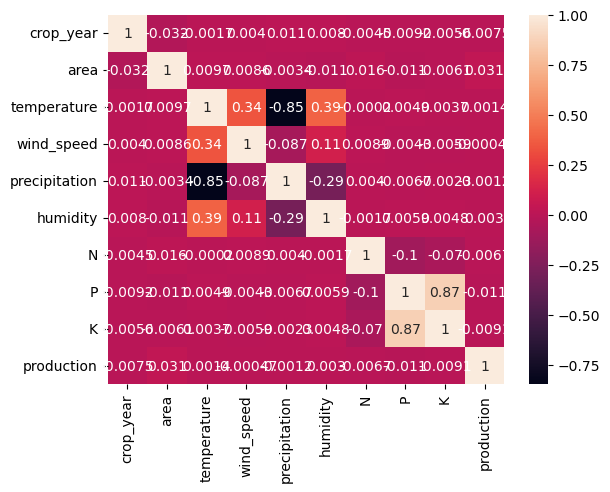

In [9]:
#First lets find out the correlation between different parameters

sns.heatmap(df.corr(),annot=True)

In [10]:
from sklearn.feature_selection import mutual_info_regression

In [147]:
len(y_test)

4000

In [11]:
#Mutual information: Since there are many variables to consider, we will use mutual information 
# to find the relative potential of a feature
def calculate_ml_scores(kf):
    X = kf.copy()
    y = X["production"]
    
    X.drop("production", axis=1, inplace = True)
    
    
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()
    
    

    discrete_features = X.dtypes == int
    
 
    
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return X, y, mi_scores
    

In [12]:
X,y, mi_scores = calculate_ml_scores(kf = df)

In [13]:
mi_scores

area              0.901325
crop_names        0.291323
state_names       0.260807
district_names    0.190829
season_names      0.044952
crop_year         0.021662
humidity          0.011940
wind_speed        0.011298
precipitation     0.006010
P                 0.003775
temperature       0.003247
soil_type         0.000943
N                 0.000102
K                 0.000000
Name: MI Scores, dtype: float64

In [14]:
# it seems that N,P,K,soil_type  are irrelevant in prediting our model so we just drop these columns
# Also For this specific model, we will consider only state_names and drop the distric_names columns 

df = df.drop(['district_names', 'N', 'P', 'K','soil_type'], axis =1)

In [65]:
df.head()

,state_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,production
96862,Karnataka,2005,Rabi,Horse-gram,1122.0,20.48349,1.971802,1013.011877,64.876363,836.0
109879,Madhya Pradesh,2003,Whole Year,Brinjal,194.0,19.95000,1.830000,1013.000000,43.000000,0.0
1543,Andhra Pradesh,2010,Rabi,Sesamum,334.0,23.09000,1.410000,1011.000000,91.000000,118.0
4688,Andhra Pradesh,2014,Rabi,Tomato,538.0,20.48349,1.971802,1013.011877,64.876363,7289.0
230491,Uttar Pradesh,2011,Rabi,Coriander,59.0,20.48349,1.971802,1013.011877,64.876363,33.0


In [15]:
# converting categorial columns to numerical format for our upcoming ML algorithms to work 
from sklearn.preprocessing import OneHotEncoder

In [16]:
yield_df_onehot = pd.get_dummies(df, columns=['state_names','season_names','crop_names'])
#Seperating features and target label 
features= yield_df_onehot.loc[:, yield_df_onehot.columns != 'production']
label = df['production']
features.head()

,crop_year,area,temperature,wind_speed,precipitation,humidity,state_names_Andaman and Nicobar Islands,state_names_Andhra Pradesh,state_names_Arunachal Pradesh,state_names_Assam,...,crop_names_Total foodgrain,crop_names_Turmeric,crop_names_Turnip,crop_names_Urad,crop_names_Varagu,crop_names_Water Melon,crop_names_Wheat,crop_names_Yam,crop_names_other misc. pulses,crop_names_other oilseeds
96862,2005,1122.0,20.48349,1.971802,1013.011877,64.876363,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109879,2003,194.0,19.95000,1.830000,1013.000000,43.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1543,2010,334.0,23.09000,1.410000,1011.000000,91.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4688,2014,538.0,20.48349,1.971802,1013.011877,64.876363,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
230491,2011,59.0,20.48349,1.971802,1013.011877,64.876363,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
features = features.astype(int)

In [19]:
label = label.astype(int)

# Model Training

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label,test_size = 0.2,random_state =2)

In [49]:
#Creating an empty list to append all model's name and corresponding score 

model = []
r_square = []

# 1) Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression(random_state=2, n_jobs=-1)
clf.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=2)

In [25]:
pred1 = clf.predict(X_test)

In [27]:
from sklearn.metrics import r2_score

In [50]:
score1 = r2_score(y_test, pred1)
r_square.append(score1)
model.append("Logistic Regression")
score1

0.9999996985444738

# 2) Random Forrest 

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
regr = RandomForestRegressor(n_jobs=-1, random_state=2)
regr.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=2)

In [31]:
pred2 = regr.predict(X_test)

In [51]:
score2 = r2_score(y_test, pred2)
r_square.append(score2)
model.append("Random Forrest")
score2

-0.12003683690095168

# 3) Decision Tree

In [174]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
dct = DecisionTreeClassifier(random_state=2)
dct.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [176]:
pred3 = dct.predict(X_test)

In [177]:
score3 = r2_score(y_test, pred3)

In [178]:
score3

0.9999997145234495

In [148]:
len(pred3)

4000

In [52]:
score3 = r2_score(y_test, pred3)
r_square.append(score3)
model.append("Decision Tree")
score3

0.9999997145234495

# 4) Guassian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [39]:
pred4 = gnb.predict(X_test)

In [53]:
score4 = r2_score(y_test, pred4)
r_square.append(score4)
model.append("Guassian Naive Bayes")
score4

0.999999533824017

# Comparing Different Models


<Axes: title={'center': 'r2 score Comparison'}, xlabel='r2 Score', ylabel='Models'>

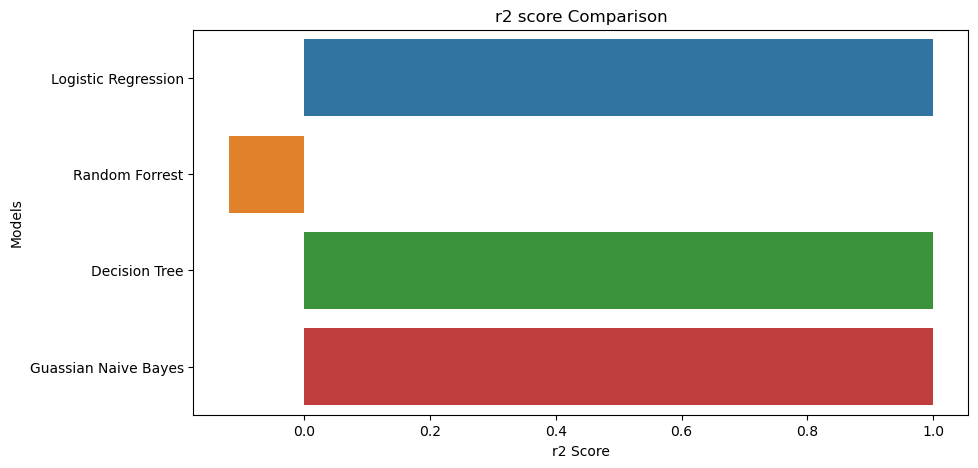

In [58]:
# Comparing the r2 score of  different models and selecting the best ones 
plt.figure(figsize=[10,5],dpi = 100)
plt.title('r2 score Comparison')
plt.xlabel('r2 Score')
plt.ylabel('Models')
sns.barplot(x = r_square,y = model)

# Model Results & Conclusions

In [86]:
yield_df_onehot2 = yield_df_onehot.drop(['crop_year'], axis =1)

In [110]:
# Usiing Decision Tree Classifier
varimp4= {'imp':dct.feature_importances_,'names':yield_df_onehot2.columns[yield_df_onehot2.columns!="hg/ha_yield"]}

<Axes: xlabel='imp', ylabel='names'>

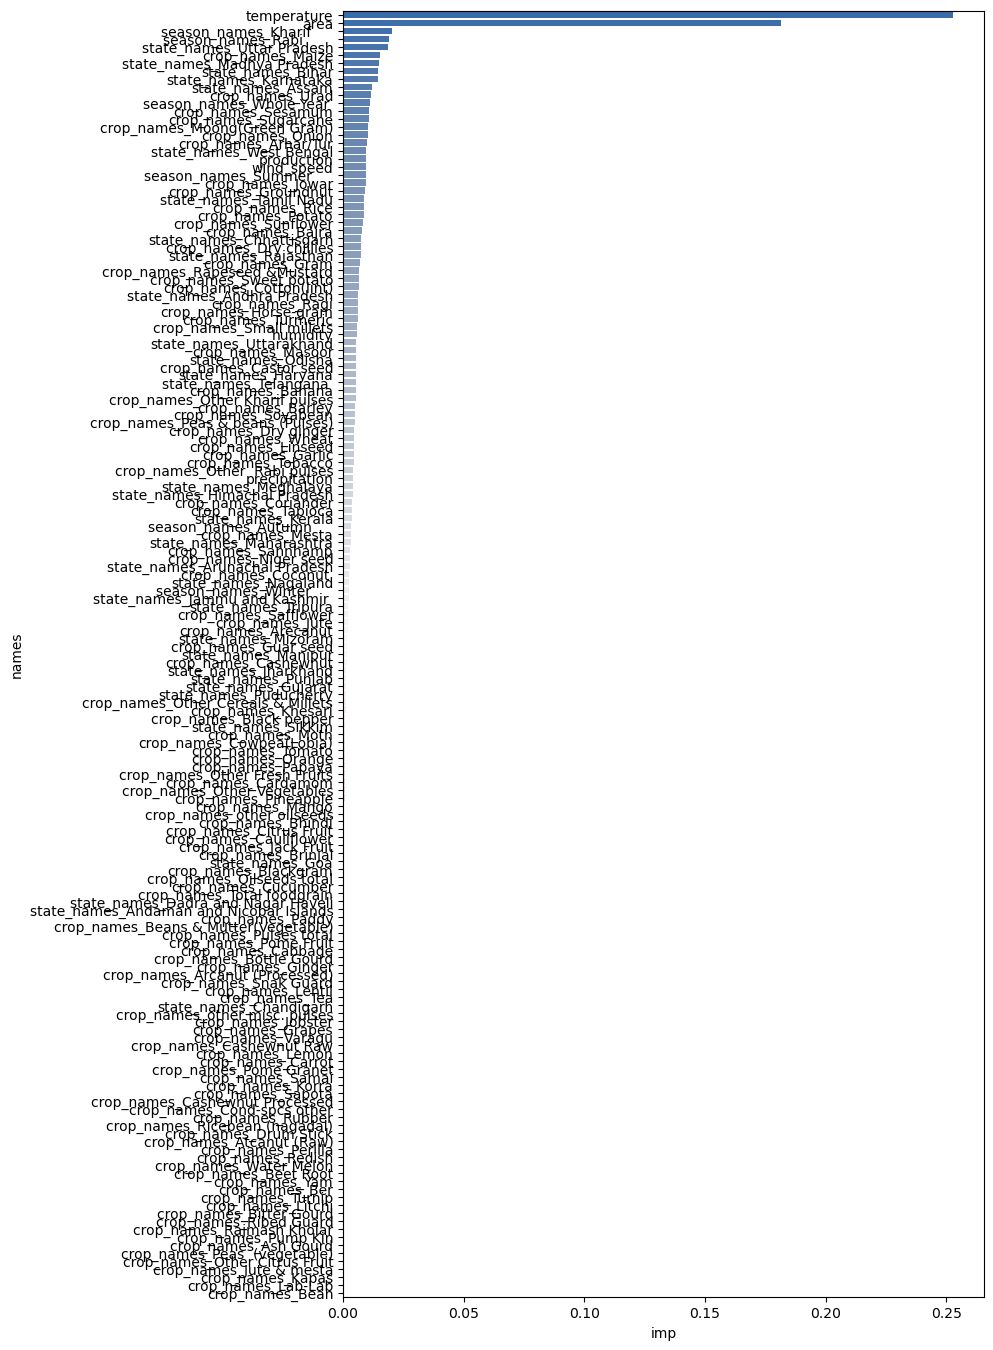

In [112]:
a4_dims = (8.27, 16.7)
fig, ax = plt.subplots(figsize=a4_dims)
ff = pd.DataFrame.from_dict(varimp4)
ff.sort_values(by="imp", ascending=False, inplace=True)
ff = ff.dropna()
sns.barplot(x="imp", y="names", palette="vlag", data=ff, orient="h", ax=ax)


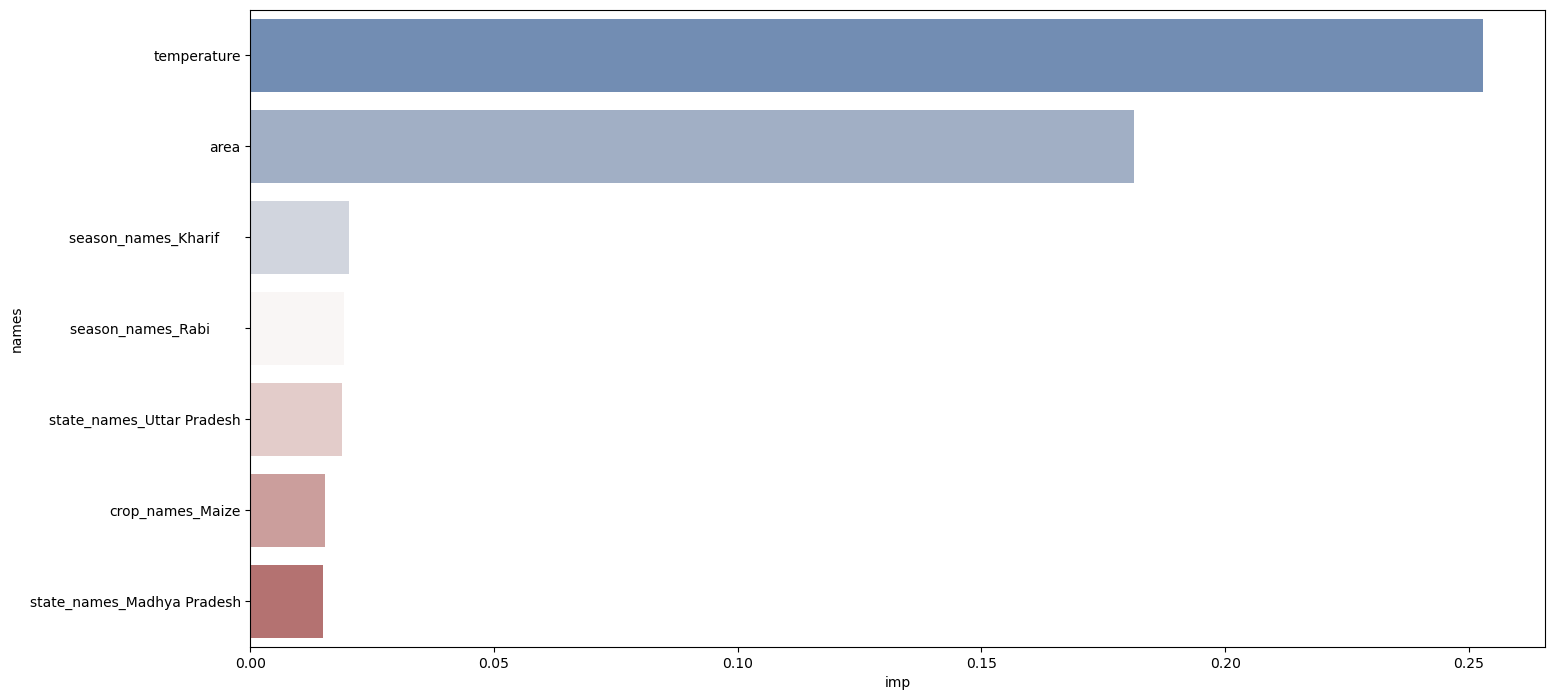

In [117]:
#7 most important factors that affect crops 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
ff=pd.DataFrame.from_dict(varimp4)
ff.sort_values(by="imp", ascending=False, inplace=True)
ff=ff.dropna()
ff=ff.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=ff,orient="h",ax=ax);

# We can observe that temperature has the highest importance in the decision making for the model, followed by area and 
# kharif season.